# Úkol 4

Stáhni si data o výsledcích marketingové kampaně jedné portugalské banky, které jsou v souboru [ukol_04_data.csv](ukol_04_data.csv). Data mají následující proměnné.

První skupina proměnných zahrnuje obecné informace o klientovi/klientce.

- age = věk (číslo)
- job = typ zaměstnání (kategorická proměnná, obsahuje následující možnostti: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")
- marital = rodinný stav (kategorická proměnná, obsahuje možnosti "married","divorced","single", "divorced" zahrnuje rozvedené i ovdovělé)
- education = vzdělání (kategorická proměnná, obsahuje následující možnosti: "unknown","secondary","primary","tertiary")
- default = má úvěr v prodlení (binární proměnná, obsahuje možnosti "yes","no")
- balance = průměrný zůstatek na účtu (numerická proměnná, v eurech)
- housing: má úvěr na bydlení (binární proměnná, obsahuje možnosti "yes", "no")
- loan:  má osobní půjčku (binární proměnná, zahrnuje možnosti "yes","no")

Druhá skupina proměnných se týká posledního kontaktu v aktuální kampani

- contact = způsob navázání kontaktu (kategorická proměnná, obsahuje možnosti "unknown","telephone","cellular")
- day = den v měsíci posledního kontaktu (číselná proměnná)
- month = měsíc posledního kontaktu (kategoriální proměnná, obsahuje možnosti "jan", "feb", "mar", …, "nov", "dec")
- duration = délka posledního kontaktu v sekundách (číselná proměnná)

Třetí skupina obsahuje zbývající vstupní proměnné

- campaign = počet kontaktů během aktuální kampaně (včetně posledního, číselná proměnná)
- pdays = počet dnů uplynulých od posledního kontaktu s klientem (číselná proměnná, obsahuje -1, pokud klient/klientka zatím nebyl(a) kontaktována)
- previous = počet kontaktů před stávající kampaní (číselná proměnná)
- poutcome = výsledek předchozí kampaně (kategorická proměnná, obsahuje možnosti "unknown","other","failure","success")

Výstupní proměnná
- y = informace, zda si klient/klientka založil(a) termínovaný účet (binární proměnná, obsahuje možnosti ano/ne)

Pro splnění úkolu je třeba provést následující body.

- Vytvoř rozhodovací strom na základě všech vstupních proměnných, s výjimkou proměnných `day` a `month`. Výstupní proměnnou je informace, zda si klient založní termínovaný účet. Omez výšku stromu na 4 patra a vygeneruj obrázek (v rámci Jupyter notebooku nebo jej ulož jako samostatný obrázek). Kategoriální proměnné uprav pomocí OneHotEncoder, číselné proměnné nijak upravovat nemusíš. Dále vytvoř matici záměn a urči výši metriky `accuracy`.
- Vedení marketingového oddělení banky rozhodlo, že chce využít strojové učení k efektivní kampani. Chce ale vybrat nejlepší algoritmus, který bude predikovat, kdo z klientů má o termínovaný účet zájem. Následně bude kontaktovat ty, u kterých model predikuje zájem, a nebude kontaktovat ty, u kterých model bude predikovat nezájem. Algoritmus bude vybrán na základě jedné z metrik, které jsme si ukazovali na 9. lekci. Vedení marketingového oddělení se chce vyhnout zbytečnému kontaktování klientů, kteří o termínovaný účet nemají zájem. Nevadí, pokud se neozvou někomu, kdo o termínovaný vklad zájem má. Vyber podle této preference vedení vhodnou metriku. Metriku napiš jako komentář v programu nebo jej doplň do buňky v Jupyter notebooku.
- Vypočítej hodnotu vybrané metriky pro rozhodovací strom, který byl vytvořen v prvním bodě.
- Využij algoritmus K Nearest Neighbours k predikci, zda si klient/klientka založí termínovaný účet. Využij všechny vstupní proměnné, s výjimkou proměnných `day` a `month`. Kategoriální proměnné uprav pomocí `OneHotEncoder` (tj. stejně jako u rozhodovacího stormu). Na číselné proměnné tentokrát použij StandardScaler. Pomocí cyklu (nebo pomocí GridSearchCV) urči počet uvažovaných sousedů, které algoritmus bere v úvahu. Uvažuj následující hodnoty parametru: 3, 7, 11, 15, 19, 23. Jaká je nejlepší hodnota metriky? A je lepší než u rozhodovacího stromu?
- Jako druhý využij algoritmus Support Vector Machine. Využij lineární verzi, tj. `LinearSVC`. Algoritmus využij s výchozími hodnotami parametrů, tj. nemusíš zkoušet různé hodnoty parametrů. Vypočti hodnotu požadované metriky.
- Porovnej hodnoty metrik pro rozhodovací strom, K Nearest Neighbours a Support Vector Machine. Ve kterém z bodů jsme dosáhli nejvyšší hodnoty metriky?

- Bonus: Pomocí cyklu vyzkoušej další možné výšky rozhodovacího stromu, například v rozmezí 5 až 12.

## Nápověda

Níže je načtení dat. V případě rozhodovacího stromu není potřeba používat scaler, data pouze převedeme na matici. Tento postup jsme si ukazovali na 10. lekci.

In [1]:
import pandas
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from pydotplus import graph_from_dot_data
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
import matplotlib.pyplot as plt


In [2]:
import os
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

In [3]:
data = pandas.read_csv("ukol_04_data.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
import numpy

y = data["y"]

categorical_columns = ["job", "marital", "education", "default", "housing", "loan", "contact", "campaign", "poutcome"]
numeric_columns = ["age", "balance", "duration", "pdays", "previous"]
numeric_data = data[numeric_columns].to_numpy()



encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(data[categorical_columns])
encoded_columns = encoded_columns.toarray()

X = numpy.concatenate([encoded_columns, numeric_data], axis=1)
X

array([[  0.,   0.,   0., ..., 261.,  -1.,   0.],
       [  0.,   0.,   0., ..., 151.,  -1.,   0.],
       [  0.,   0.,   1., ...,  76.,  -1.,   0.],
       ...,
       [  0.,   0.,   0., ..., 151.,  -1.,   0.],
       [  0.,   1.,   0., ..., 129., 211.,   3.],
       [  0.,   0.,   1., ..., 345., 249.,   7.]])

Textové zápisy převedeme  na array pomocí metody toarray

In [5]:
encoder.get_feature_names_out()

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'campaign_1', 'campaign_2',
       'campaign_3', 'campaign_4', 'campaign_5', 'campaign_6',
       'campaign_7', 'campaign_8', 'campaign_9', 'campaign_10',
       'campaign_11', 'campaign_12', 'campaign_13', 'campaign_14',
       'campaign_15', 'campaign_16', 'campaign_17', 'campaign_18',
       'campaign_19', 'campaign_20', 'campaign_21', 'campaign_22',
       'campaign_23', 'campaign_24', 'campaign_25', 'campaign_26',
       'campaign_27', '

In [6]:
#Data na testovací a trénovací rozdělíme ručně
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

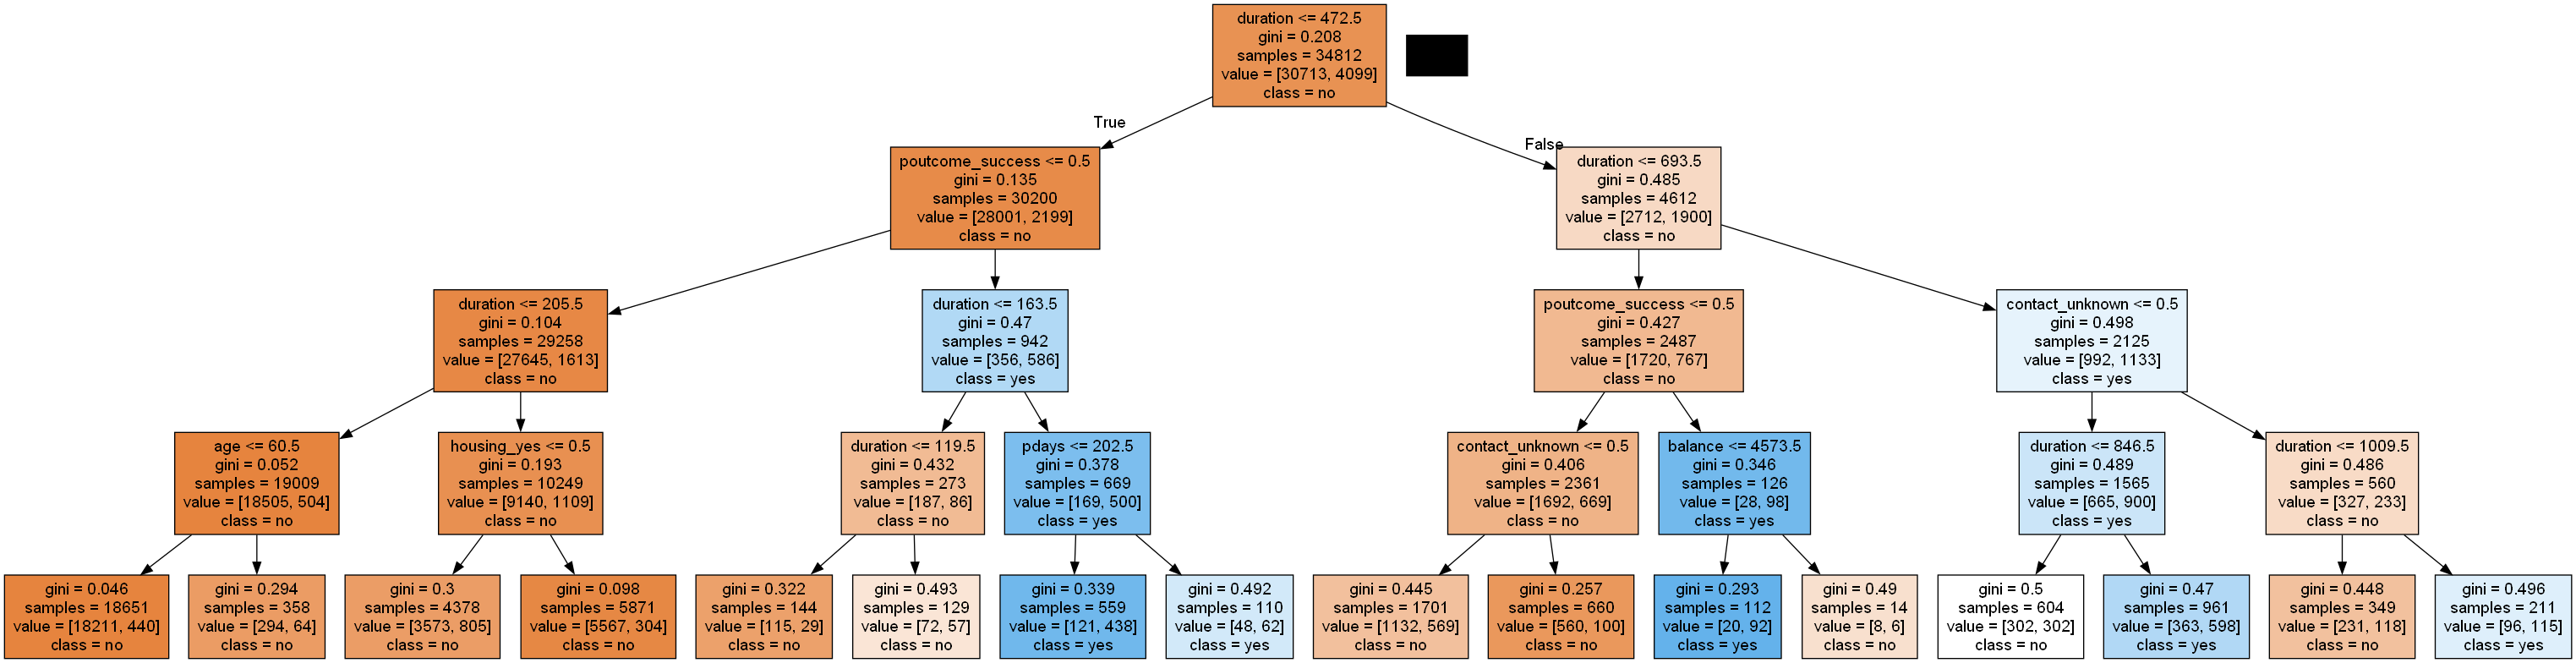

In [7]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, feature_names=list(encoder.get_feature_names_out()) + numeric_columns, class_names=["no", "yes"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

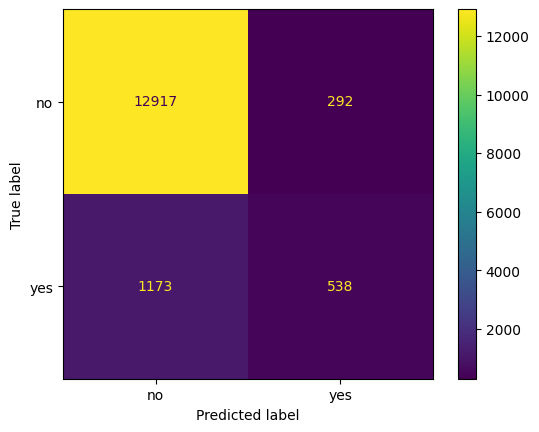

In [8]:
#matice záměn
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
#model přepověděl, že 538 klientů si založilo termínovaný účet a 12917 si nezaložilo termínovaný účet. 
# Chyby kdy model předpověděl, že 1173 klientů nezaložilo účet, ale ve skutečnosti založeno. Dále 292 klientů založilo termínovaný účet, ale ve skutečnosti nezaložilo.

In [9]:
accuracy_score(y_test, y_pred)

0.9018096514745308

In [10]:
precision_score(y_test, y_pred, pos_label="yes") #hodnota metriky pro vedení marketingového oddělení je 65%

0.6481927710843374

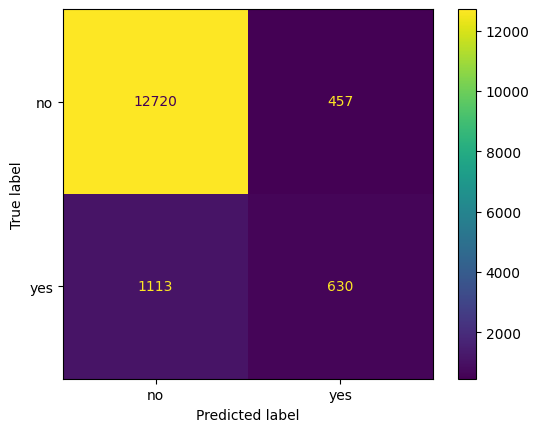

In [11]:
scaler = StandardScaler()
numeric_data = scaler.fit_transform(data[numeric_columns])

encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(data[categorical_columns])
encoded_columns = encoded_columns.toarray()

X = numpy.concatenate([encoded_columns, numeric_data], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
)

In [12]:
from sklearn.metrics import accuracy_score

ks = range(3, 31, 2)
accuracy_scores = []

for k in ks:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

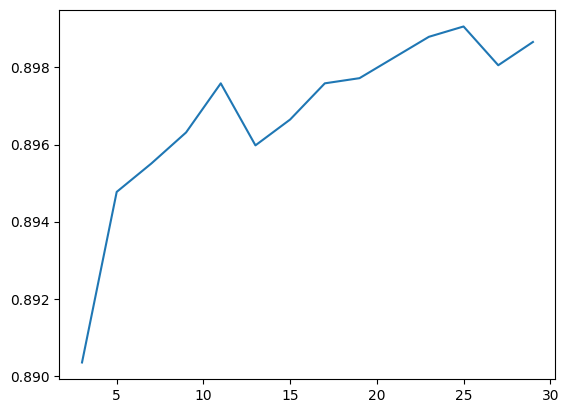

In [13]:
plt.plot(ks, accuracy_scores)

c:\Users\petrekova\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


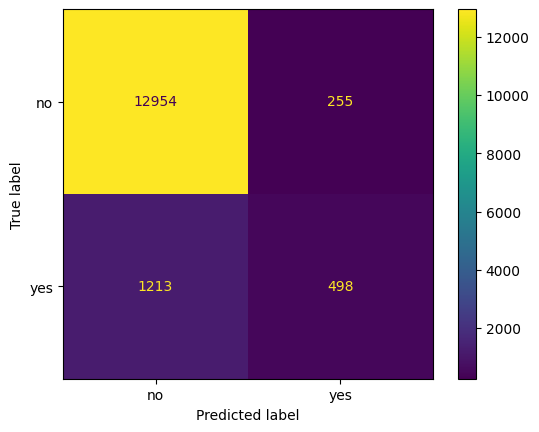

In [14]:
scaler = StandardScaler()
numeric_data = scaler.fit_transform(data[numeric_columns])

encoder = OneHotEncoder()
encoded_columns = encoder.fit_transform(data[categorical_columns])
encoded_columns = encoded_columns.toarray()

X = numpy.concatenate([encoded_columns, numeric_data], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

ConfusionMatrixDisplay.from_estimator(
    clf,
    X_test,
    y_test,
)

In [15]:
accuracy_score(y_test, y_pred)

0.9016085790884718

Hodnota metriky `accuracy` je přibližně 90 %.

Hodnota metriky, která je důležitá pro vedení marketingového oddělení, je přibližně 65 %.

Pokud použiješ cyklus, je v případě KNN nejlepší hodnota pametru 25, požadovaná metrika je přibližně 55 %.

V případě `LinearSVC` se může zobrazit zpráva `ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.`. Tu můžeš ignorovat. Požadovaná metrika je přibližně 84 %.

Pokud vyzkoušíš maximální výšky stromu v rozmězí 5 až 12, hodnota metriky bude vždy menší než v případě `LinearSVC`.

### EDIT 2023-06-13

Pozor na to, že při použití `GridSearchCV` budete mít výsledky jiné. Ty uvedené se vztahují k použití cyklu. `GridSearchCV` postupuje trochu jinak při hledání, vícekrát zkouší různá rozdělení na trénovací a testovací data a tím pádem jsou jeho výsledky méně ovlivněné tím, jak jsou data rozdělena.

Plus optimální výsledek není 25 (což chybí v parametrech, které máte brát v úvahu), ale 23.